In [1]:
import os
print(os.getcwd())
os.chdir('D:/handwritten')
print(os.getcwd())

C:\Users\Administrator
D:\handwritten


In [42]:
import numpy as np
features_pca = np.load('top100_features_Proportional_90_pca.npy')
labels = np.load('top100_Labels_Proportional.npy')
print("labels：", labels.shape)
print("features_pca：", features_pca.shape)

labels： (60261,)
features_pca： (60261, 92)


In [43]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# create LabelEncoder instance
label_encoder = LabelEncoder()

# Convert the string category label to an integer
y_encoded = label_encoder.fit_transform(labels)

# Assign the PCA-processed features to X
X = features_pca

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

In [66]:
import xgboost as xgb

# Create DMatrix data structure
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# Set parameters
params = {
    'max_depth': 8,         # maximum depth of tree
    'eta': 0.1,             # learning rate
    'objective': 'multi:softmax',  # Objective function, softmax for multi-class classification
    'num_class': len(set(y_encoded)),  # Number of categories
    'tree_method': "hist", 'device' :"cuda"  # Histogram algorithm using GPU
}

# Number of training rounds
num_round = 1000

# Training
bst = xgb.train(params, dtrain, num_round)

# Predict
preds = bst.predict(dtest)

# Evaluation
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, preds)
print(f"Accuracy: {accuracy}")

Accuracy: 0.6406703725213639


In [54]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, confusion_matrix
from sklearn.metrics import matthews_corrcoef, classification_report
import numpy as np

# Calculate basic evaluation metrics
accuracy = accuracy_score(y_test, preds)
precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, preds.astype(int), average='weighted')
mcc = matthews_corrcoef(y_test, preds.astype(int))

# show confusion matrix
conf_matrix = confusion_matrix(y_test, preds.astype(int))

# Output detailed classification report
class_report = classification_report(y_test, preds.astype(int), target_names=label_encoder.classes_)

# Make sure the prediction result is an integer type
preds = preds.astype(int)

# Convert predictions and actual labels back to original string labels
predicted_labels = label_encoder.inverse_transform(preds)
actual_labels = label_encoder.inverse_transform(y_test)

# Print all evaluation
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1_score)
print("Matthews Correlation Coefficient:", mcc)
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)

# Optional: Print some comparisons of predicted results and actual labels
print("\nSample Predictions vs. Actual Labels:")
for i in range(10):  # Print the first 10 prediction results and compare them with actual labels
    print(f"Predicted: {predicted_labels[i]}, Actual: {actual_labels[i]}")


Accuracy: 0.6406703725213639
Precision: 0.6212591196859929
Recall: 0.6406703725213639
F1 Score: 0.6129256648917167
Matthews Correlation Coefficient: 0.6243948419038073

Confusion Matrix:
 [[ 26   1   1 ...   0   0   0]
 [  2 186   3 ...   0   0   0]
 [  0  10  14 ...   0   0   0]
 ...
 [  0   0   0 ... 106   1   0]
 [  0   0   0 ...   1  26   0]
 [  0   0   0 ...   0   0  51]]

Classification Report:
               precision    recall  f1-score   support

           !       0.68      0.58      0.63        45
           "       0.69      0.60      0.64       312
           '       0.34      0.08      0.14       165
          's       0.67      0.14      0.23        29
           (       0.66      0.54      0.59        35
           )       0.45      0.21      0.29        42
           ,       0.75      0.89      0.81      1113
           -       0.76      0.91      0.83        65
           .       0.89      0.90      0.89       964
         ...       0.71      0.69      0.70        35


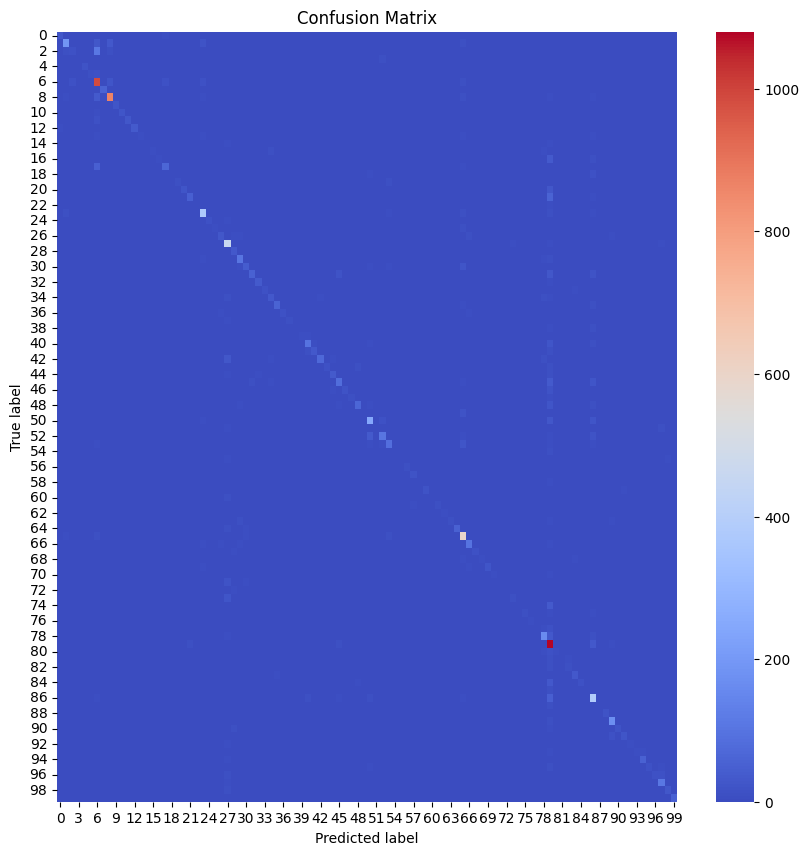

In [65]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 10))  
sns.heatmap(conf_matrix, annot=False, cmap='coolwarm', fmt='d')
plt.title('Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [63]:
# List the corresponding relationships before and after encoding
label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))

label_mapping

{'!': 0,
 '"': 1,
 "'": 2,
 "'s": 3,
 '(': 4,
 ')': 5,
 ',': 6,
 '-': 7,
 '.': 8,
 '...': 9,
 ':': 10,
 ';': 11,
 '?': 12,
 'A': 13,
 'And': 14,
 'But': 15,
 'He': 16,
 'I': 17,
 'In': 18,
 'It': 19,
 'Mr.': 20,
 'The': 21,
 'This': 22,
 'a': 23,
 'about': 24,
 'all': 25,
 'an': 26,
 'and': 27,
 'are': 28,
 'as': 29,
 'at': 30,
 'be': 31,
 'been': 32,
 'being': 33,
 'but': 34,
 'by': 35,
 'can': 36,
 'could': 37,
 'do': 38,
 'first': 39,
 'for': 40,
 'from': 41,
 'had': 42,
 'has': 43,
 'have': 44,
 'he': 45,
 'her': 46,
 'him': 47,
 'his': 48,
 'if': 49,
 'in': 50,
 'into': 51,
 'is': 52,
 'it': 53,
 'like': 54,
 'made': 55,
 'man': 56,
 'may': 57,
 'me': 58,
 'more': 59,
 'much': 60,
 'my': 61,
 'new': 62,
 'no': 63,
 'not': 64,
 'of': 65,
 'on': 66,
 'one': 67,
 'only': 68,
 'or': 69,
 'other': 70,
 'out': 71,
 'over': 72,
 'said': 73,
 'she': 74,
 'so': 75,
 'some': 76,
 'than': 77,
 'that': 78,
 'the': 79,
 'their': 80,
 'them': 81,
 'there': 82,
 'they': 83,
 'this': 84,
 'time':

In [7]:
from joblib import dump, load
dump(bst, '75_xgb_model.joblib')

['75_xgb_model.joblib']

In [8]:
import pickle

# Save model
with open('75_xgb_model.pickle', 'wb') as f:
    pickle.dump(bst, f)